### Registration number : 2003287

In [1]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import warnings # To ignore the warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.metrics import precision_score,recall_score,f1_score

In [2]:
# reading the data
train=pd.read_csv("CE802_P2_Data.csv")
test=pd.read_csv("CE802_P2_Test.csv")

In [3]:
train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,20,-21.42,13.1,464.04,-6.10,-4.50,-18.66,27.54,20.1,-7.08,-16.32,365,0.47,3.40,-3.90,False
1,20,-27.12,13.5,299.04,-6.18,-4.91,-18.66,27.44,18.2,-12.84,-11.07,205,-129.53,7.12,NaN,False
2,20,-33.87,10.5,854.04,-9.32,-7.16,-18.66,25.44,11.9,-5.46,-11.01,330,-44.53,4.62,-3.84,False
3,20,-25.38,19.4,809.04,-12.69,-4.95,-23.66,25.54,19.6,-11.31,-7.53,215,-54.53,2.26,NaN,False
4,20,-23.22,16.0,359.04,-7.70,-4.36,-8.66,26.64,25.8,-12.69,-10.20,85,-134.53,-0.20,-7.76,True


### Data Preprocessing & Feature Engineering

In [4]:
# null values in F15 column in train data
train.info() 
print("----------------------------------------------")
# null values in F15 column in test data
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column

In [5]:
# To get an initial understanding of data
train.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,10.806667,-31.029780,7.708560,387.376000,-9.067533,-7.674867,-11.298000,22.015627,9.93752,-4.958840,-12.037060,109.024667,-63.944000,4.917573,-5.843013
std,9.009814,7.662813,6.930553,214.250623,2.491236,2.545172,7.159315,6.333818,8.65042,7.541549,3.326893,117.334580,40.188448,5.081288,1.005117
min,0.000000,-56.220000,0.000000,149.040000,-16.800000,-16.040000,-28.660000,14.640000,0.00000,-18.390000,-24.750000,0.000000,-164.530000,-4.400000,-8.200000
25%,2.000000,-36.720000,1.200000,221.040000,-10.902500,-9.560000,-18.660000,16.080000,2.48000,-12.180000,-13.770000,15.000000,-79.530000,-0.040000,-6.590000
50%,2.000000,-34.020000,2.040000,281.040000,-10.020000,-8.665000,-7.660000,16.800000,4.14000,-2.010000,-11.580000,50.000000,-58.530000,6.880000,-5.850000
75%,20.000000,-23.542500,14.100000,569.040000,-6.690000,-5.220000,-5.660000,27.540000,16.40000,0.870000,-10.080000,195.000000,-45.530000,8.680000,-5.122500
max,20.000000,-17.610000,20.700000,884.040000,-4.560000,-3.110000,-2.660000,34.940000,31.40000,18.030000,-4.950000,390.000000,50.470000,22.980000,-3.120000


Text(0.5, 1.0, 'Box Plot')

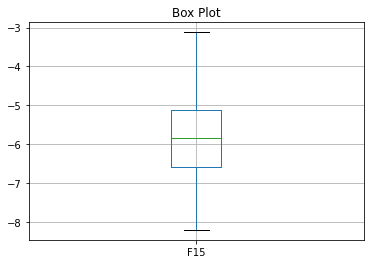

In [6]:
# Checking for outliers
train.boxplot(['F15'])
plt.title('Box Plot')

In [7]:
# If you see below graphs you can clearly see that there is a high correlation between F15 and Class. So, we cannot remove this feature.
# Replacing null values with mean as there are no outliers, else replace with median
train['F15']=train['F15'].fillna(train['F15'].mean())
test['F15']=test['F15'].fillna(test['F15'].mean())

<AxesSubplot:>

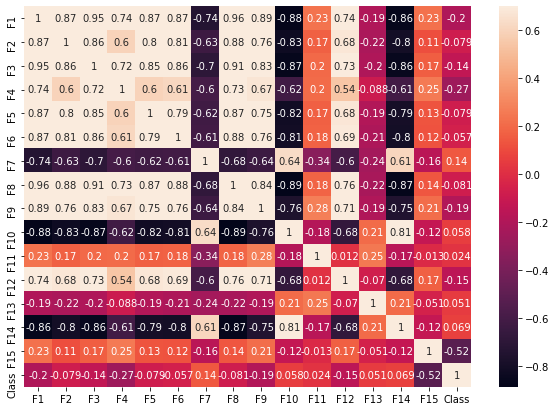

In [8]:
# Checking correlation b/w different variables
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),vmax=.7,cbar=True,annot=True)

Text(0.5, 1.0, 'Correlation Coefficients w.r.t Class')

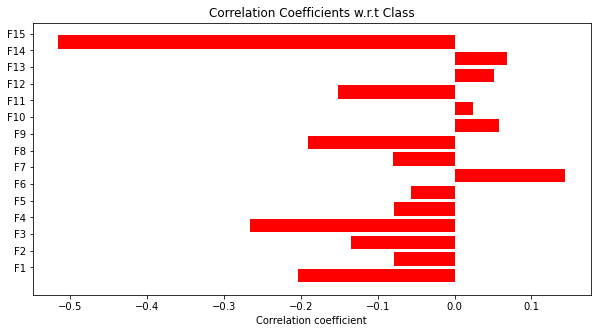

In [9]:
# Plotting correlations
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[0:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train['Class'].values)[0,1])
ind = np.arange(len(labels))
width = 1
fig, ax = plt.subplots(figsize=(10,5))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Class")

If you see the above graph there's a high correlation between almost all the columns

In [10]:
# seperating train output variable
X_train = train.drop('Class',axis=1)
Y_train = train['Class']
# normalizing the train data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_scaled, columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15'])
# seperating train output variable
X_test = test.drop('Class',axis=1)
Y_test= test['Class']
# normalizing the test data
X_test_scaled = scaler.fit_transform(X_test.values)
# seperating test output variable
X_test = pd.DataFrame(X_test_scaled, columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15'])

In [11]:
# Checking if the data is unbalanced 
Y_train.value_counts()

False    809
True     691
Name: Class, dtype: int64

As you can see the data is not un-balanced

### Model Building & Hyper-parameter Tuning

#### Decision Tree

In [12]:
classifier1 = DecisionTreeClassifier()
# Taking the Hyper parameters
parameters = {'max_depth': range(10,30,1),'min_samples_split' : range(10,50,2),'min_samples_leaf' : range(10, 30,2)}
# Applying Grid Search to find the best model and the best parameters
grid_search1 = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)# n_jobs = -1, for all core processors to run
# Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
# predicting output
score = cross_val_score(grid_search1, X_train, Y_train, cv=k_fold, n_jobs=1,scoring = 'accuracy')
# K-Fold scores
print("K-Fold scores :", score)
# Accuracy
print("Cross validation Accuracy:",round(np.mean(score)*100, ndigits = 3))
# predicting Y_train 
y_pred = cross_val_predict(grid_search1, X_train, Y_train, cv=5)
# F1 score
print("F1 score:",round(f1_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(Y_train, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
fp, tp, thresold = roc_curve(Y_train, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

K-Fold scores : [0.82666667 0.77666667 0.82666667 0.79333333 0.81666667]
Cross validation Accuracy: 80.8
F1 score: 0.792
precision score: 0.792
recall score: 0.792
ROC Area under Curve: 0.789


#### KNN 

In [13]:
# Choosing K value
score1 = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, Y_train, cv = k_fold)
    score1.append(round(np.mean(score)*100, 2))

Text(0, 0.5, 'Score')

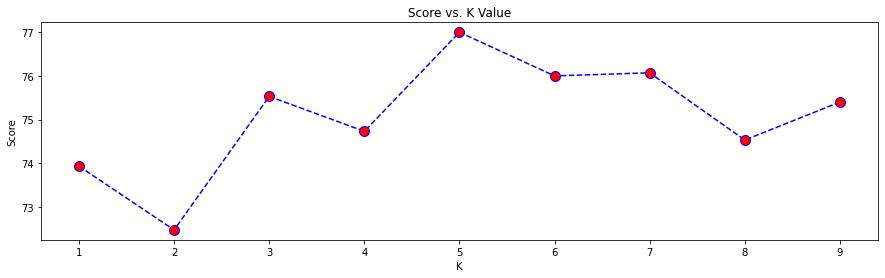

In [14]:
# Plotting Score vs K value 
plt.figure(figsize=(15,4))
plt.plot(range(1,10),score1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

As you can see above when K is 5 the score is high

In [15]:
classifier2 = KNeighborsClassifier(n_neighbors = 5)
# predicting output
score = cross_val_score(classifier2, X_train, Y_train, cv=k_fold, n_jobs=1,scoring = 'accuracy')
# K-Fold scores
print("K-Fold scores :", score)
# Accuracy
print("Cross validation Accuracy:",round(np.mean(score)*100, ndigits = 3))
# predicting Y_train 
y_pred = cross_val_predict(classifier2, X_train, Y_train, cv=5)
# F1 score
print("F1 score:",round(f1_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(Y_train, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
fp, tp, thresold = roc_curve(Y_train, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

K-Fold scores : [0.79       0.75333333 0.79666667 0.75666667 0.75333333]
Cross validation Accuracy: 77.0
F1 score: 0.757
precision score: 0.76
recall score: 0.759
ROC Area under Curve: 0.753


#### SVM

In [16]:
classifier3 = SVC()
# Taking the Hyper parameters
parameters = [{'C': [10, 100, 1000,1500], 'kernel': ['rbf'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# Applying Grid Search to find the best model and the best parameters
grid_search2 = GridSearchCV(estimator = classifier3,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)# n_jobs = -1, for all core processors to run
# predicting output
score = cross_val_score(grid_search2, X_train, Y_train, cv=k_fold, n_jobs=1,scoring = 'accuracy')
# K-Fold scores
print("K-Fold scores :", score)
# Accuracy
print("Cross validation Accuracy:",round(np.mean(score)*100, ndigits = 3))
# predicting Y_train 
y_pred = cross_val_predict(grid_search2, X_train, Y_train, cv=5)
# F1 score
print("F1 score:",round(f1_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(Y_train, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
fp, tp, thresold = roc_curve(Y_train, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

K-Fold scores : [0.9        0.91       0.91       0.91333333 0.88666667]
Cross validation Accuracy: 90.4
F1 score: 0.901
precision score: 0.901
recall score: 0.901
ROC Area under Curve: 0.9


####  Random Forest

In [17]:
classifier4 = RandomForestClassifier()
# Taking the Hyper parameters
parameters = {#"n_estimaters": [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
 "max_depth": [5, 10],
 "max_features": [3,5,10],
 "min_samples_split": [2, 5, 7],
 "bootstrap": [True, False],
 "criterion": ["gini", "entropy"]}
# Applying Grid Search to find the best model and the best parameters
grid_search3 = GridSearchCV(estimator = classifier4,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)# n_jobs = -1, for all core processors to run
# predicting output
score = cross_val_score(grid_search3, X_train, Y_train, cv=k_fold, n_jobs=1,scoring = 'accuracy')
# K-Fold scores
print("K-Fold scores :", score)
# Accuracy
print("Cross validation Accuracy:",round(np.mean(score)*100, ndigits = 3))
# predicting Y_train 
y_pred = cross_val_predict(grid_search3, X_train, Y_train, cv=5)
# F1 score
print("F1 score:",round(f1_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(Y_train, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
fp, tp, thresold = roc_curve(Y_train, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

K-Fold scores : [0.87       0.85       0.89       0.84       0.85666667]
Cross validation Accuracy: 86.133
F1 score: 0.86
precision score: 0.861
recall score: 0.861
ROC Area under Curve: 0.858


#### XGBoost 

In [18]:
classifier5 = xgboost.XGBClassifier()

# Taking the Hyper parameters
n_estimators = [100, 500, 900, 1200, 1500]
max_depth = list(range(3,12,4))
# I am only taking tree booster, as most of the times it outperforms linear booster
booster=['gbtree'] 
learning_rate=[0.01,0.05,0.1]
min_child_weight=list(range(1,10,5))
base_score=[0.25,0.5,0.75,1]

parameters = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
# Applying Grid Search to find the best model and the best parameters
grid_search4 = GridSearchCV(estimator = classifier5,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1) # n_jobs = -1, for all core processors to run
# predicting output
score = cross_val_score(grid_search4, X_train, Y_train, cv=k_fold, n_jobs=1,scoring = 'accuracy')
# K-Fold scores
print("K-Fold scores :", score)
# Accuracy
print("Cross validation Accuracy:",round(np.mean(score)*100, ndigits = 3))
# predicting Y_train 
y_pred = cross_val_predict(grid_search4, X_train, Y_train, cv=5)
# F1 score
print("F1 score:",round(f1_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(Y_train,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(Y_train, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
fp, tp, thresold = roc_curve(Y_train, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[23:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

As you can see from above results SVM is performing better than any other classifiers.

### Output 

In [18]:
# Fitting the data with the best classifier
Best_classifier = grid_search2.fit(X_train, Y_train)

I am using 'Pickle' file for storing the model so that we do need to train the model again and again during Model Deployment. You can ignore this if you do not want to save the model.

In [19]:
# Dumping the model in pickle document so that we can don't need to train and fit the model repeatedly 
import pickle
with open('Best_Model_P2.pkl', 'wb') as f:
        pickle.dump(Best_classifier, f)

In [20]:
# Loading the model and predicting the output
with open('Best_Model_P2.pkl', 'rb') as f:
    Best_Classifier = pickle.load(f)
Y_test = Best_Classifier.predict(X_test)

In [21]:
# Loading the test data
test=pd.read_csv("CE802_P2_Test.csv")
X_test_Final = test.drop('Class',axis=1)

In [22]:
# Final output
X_test_Final["Class"] = pd.DataFrame({"Class": Y_test})
X_test_Final.to_csv('CE802_Test_P2.csv', index=False)
X_test_Final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,2,-38.31,1.62,248.04,-11.74,-9.25,-5.66,16.40,2.92,1.17,-13.14,2,-74.53,9.18,NaN,True
1,20,-24.03,11.40,629.04,-8.02,-5.35,-28.66,27.14,16.70,-10.56,-8.67,15,-14.53,2.06,NaN,False
2,2,-45.06,1.84,206.04,-11.73,-9.28,-7.66,15.94,1.70,-1.77,-20.37,3,-40.53,7.12,NaN,True
3,20,-22.35,18.30,539.04,-7.14,-4.15,-28.66,27.14,11.70,-14.97,-8.55,195,-29.53,1.46,-6.93,True
4,20,-22.47,10.70,749.04,-7.13,-4.60,-8.66,35.14,28.70,-12.33,-10.47,285,-74.53,-1.74,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,20,-22.80,14.80,329.04,-5.88,-4.92,-18.66,25.34,13.70,-14.28,-10.98,195,-29.53,3.28,NaN,False
1496,2,-37.11,1.48,239.04,-14.27,-10.03,-3.66,16.34,3.02,-1.08,-11.28,20,-75.53,10.10,NaN,True
1497,2,-35.67,0.20,200.04,-10.59,-12.15,-7.66,16.42,1.92,-1.08,-9.57,20,-46.53,10.46,NaN,False
1498,2,-36.21,1.62,275.04,-11.82,-8.89,-5.66,16.64,1.82,0.36,-11.22,6,-60.53,9.24,NaN,True


In [23]:
X_test_Final["Class"].value_counts()

False    1015
True      485
Name: Class, dtype: int64